In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller

import scipy.stats as st
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [55]:
def plot_graphs(y, num_lags, acf_only=None):
    if not acf_only:
        plt.plot(y)
        plt.title("Time Series Plot")
        plt.show()
    plot_acf(y, lags=num_lags)
    plt.title("Autocorrelation Function (ACF)")
    plt.show()
    plot_pacf(y, lags=num_lags, method="ols")
    plt.title("Partial Autocorrelation Function (PACF)")
    plt.show()

In [56]:
from scipy.stats import shapiro
def shap(y):
    # Normality test
    saphiro = shapiro(y)
    
    print("Saphiro",saphiro)

In [57]:
def statistics(y): 
    # Basic statistics
    mean = np.mean(y)
    std = np.std(y)
    kur = kurtosis(y)
    skewness = skew(y)
    return {'mean': mean, 'std': std, 'kur': kur, 'skewness': skewness}

In [58]:
def adf(y):
    # Ho: the process is not stationary. We need, at least, a unit root
    # H1: the process is stationary. We have to check different models (lags)
    adf_test = adfuller(y,maxlag=10) 
    print("ADF test for the original series")
    print("Statistic Value:" , adf_test[0])
    print("p-value:" , adf_test[1])

In [59]:
from scipy.stats import norm
import seaborn as sns
def hist(y, mean, std):
    mu = np.mean(y)
    sigma = np.std(y)
    x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
    pdf = norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(y, hist = False, kde = True,
                     kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)
    
    plt.show()

In [81]:
import statsmodels.api as sm
def box_test(y, lags):
    #Correlation test
    result = sm.stats.acorr_ljungbox(y, lags=lags, return_df=True)
    return result

In [61]:
data = pd.read_csv('Individual_Homework.csv', sep = ";", decimal = ",")

In [62]:
data

,Series
0,9.087
1,8.895
2,9.478
3,7.426
4,7.261
...,...
2995,23.276
2996,23.310
2997,22.600
2998,22.595


In [63]:
y = data['Series']

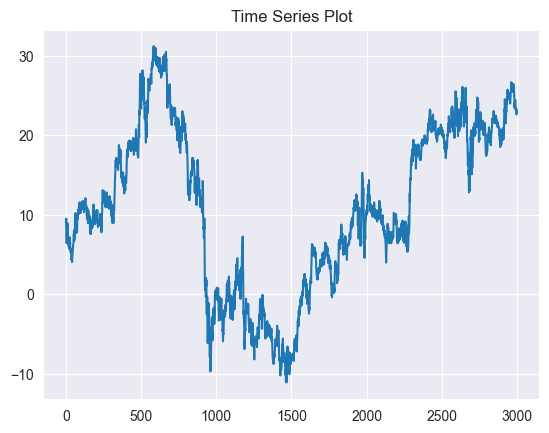

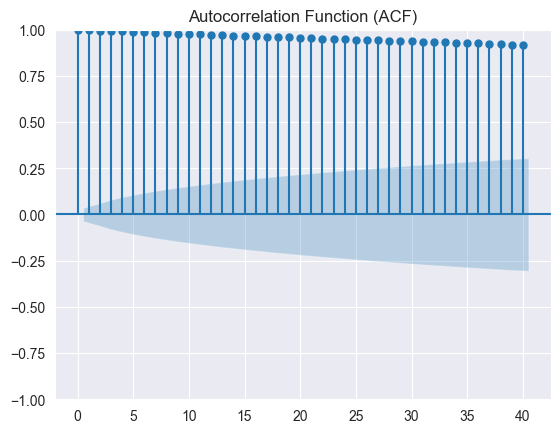

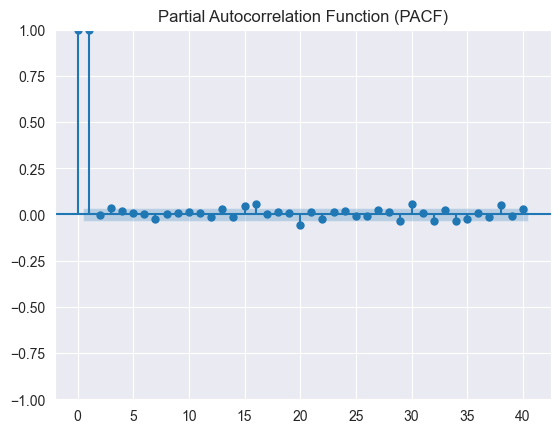

In [64]:
plot_graphs(y=y, num_lags=40)

In [65]:
stats = statistics(y)
stats

{'mean': 10.881964333333332,
 'std': 10.284162628870725,
 'kur': -0.9889095754213968,
 'skewness': -0.1703238333849572}

In [79]:
adf(data)

ADF test for the original series
Statistic Value: -1.6874217383898138
p-value: 0.43760454966756995


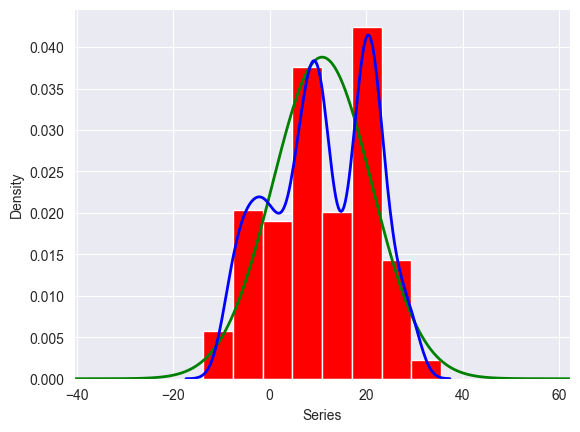

In [67]:
hist(y, mean=stats['mean'], std=stats['std'])

In [68]:
shap(y)

Saphiro ShapiroResult(statistic=0.9671036005020142, pvalue=1.1918973372694132e-25)


In [82]:
box_test(y, 40)

,lb_stat,lb_pvalue
1,2987.595544,0.0
2,5960.918561,0.0
3,8921.006644,0.0
4,11868.230130,0.0
5,14802.831216,0.0
6,17724.908329,0.0
7,20633.830176,0.0
8,23529.730938,0.0
9,26412.902877,0.0
10,29283.628858,0.0


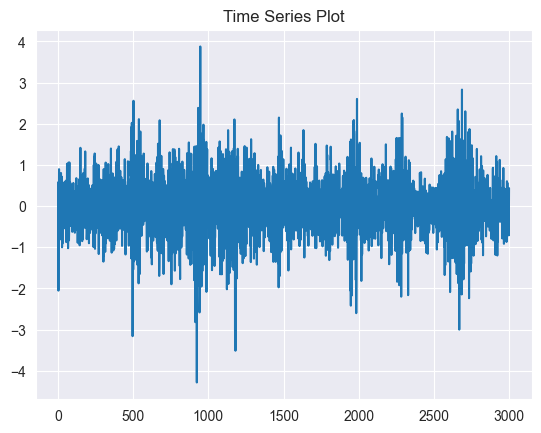

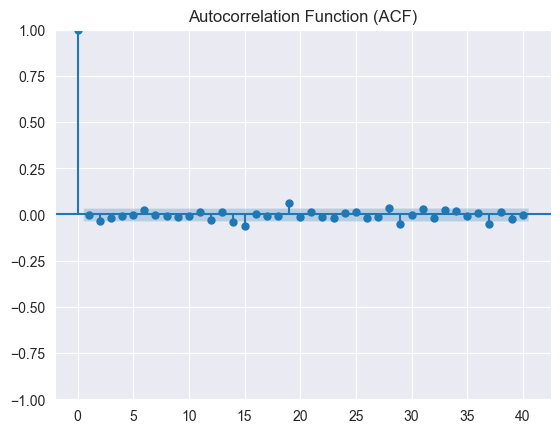

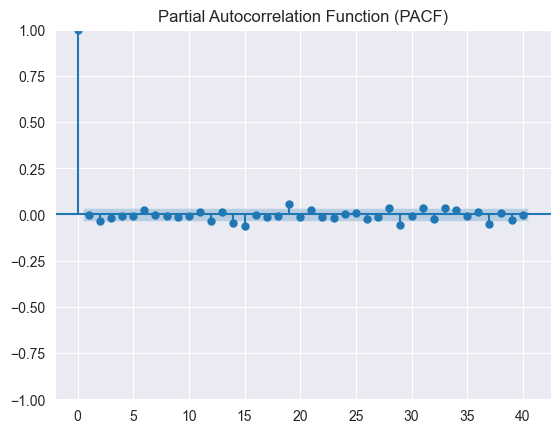

In [71]:
z = y.diff().dropna()
plot_graphs(z, 40)

In [72]:
stats = statistics(z)
stats

{'mean': 0.004649883294431477,
 'std': 0.7022322404297499,
 'kur': 1.826964413636106,
 'skewness': -0.1525909093880552}

In [73]:
adf(z)

ADF test for the original series
Statistic Value: -40.101670583747975
p-value: 0.0


In [74]:
box_test(z,20)

,lb_stat,lb_pvalue
20,40.011936,0.004978


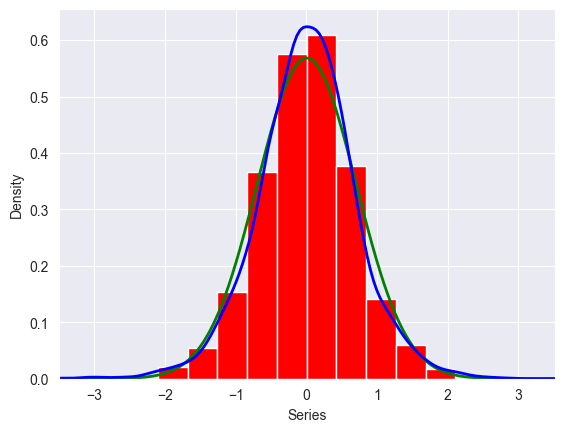

In [75]:
hist(z,mean=stats['mean'], std=stats['std'])

In [76]:
shap(z)

Saphiro ShapiroResult(statistic=0.985838770866394, pvalue=9.528967131889189e-17)
